In [1]:
import os
from os.path import join

import numpy as np
import pandas as pd
from scipy.stats import linregress

import matplotlib.pyplot as plt
%matplotlib inline

from plotting_functions import cm2inch

# Estimates

### Load individual estimates (in sample fits)

multiplicative

In [2]:
parameters = ['v', 'gamma', 's', 'tau']

estimates_list = []

estimate_files = [file for file in os.listdir(join('results', 'estimates', 'in_sample', 'GLAM'))
                  if file.endswith('.csv')]

for file in estimate_files:
    _, subject, _, _ = file.split('_')
    subject = int(subject)
    estimates = pd.read_csv(join('results', 'estimates', 'in_sample', 'GLAM', file), index_col=0)
    subject_estimates = {parameter: estimates.loc[parameter + '__0_0', 'MAP']
                         for parameter in parameters}
    subject_estimates['subject'] = subject
    estimates_list.append(pd.DataFrame(subject_estimates, index=np.zeros(1)))

individual_estimates = pd.concat(estimates_list).sort_values('subject').reset_index(drop=True)

individual_estimates['dataset'] = np.array(39 * ['krajbich2010'] + 30 * ['krajbich2011'] + 24 * ['folke2016'] + 25 * ['tavares2017'])

# Gamma estimates

In [3]:
individual_estimates['gamma'].describe()

count    118.000000
mean       0.145932
std        0.394087
min       -1.030000
25%       -0.122500
50%        0.125000
75%        0.407500
max        0.970000
Name: gamma, dtype: float64

In [4]:
individual_estimates.groupby('dataset')['gamma'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
folke2016,24.0,-0.017083,0.282804,-0.50,-0.25,-0.025,0.2075,0.46
krajbich2010,39.0,0.262821,0.484197,-0.89,-0.07,0.230,0.6750,0.97
krajbich2011,30.0,0.179000,0.408347,-1.03,-0.07,0.305,0.4625,0.81
tavares2017,25.0,0.080400,0.230552,-0.36,0.00,0.080,0.1900,0.56


In [5]:
multiplicative_estimates = individual_estimates.copy()

# Figure S1

In [6]:
import matplotlib

def figure_si1(estimates,
               parameters=['v', 'gamma', 's', 'tau'],
               labels=dict(v=r'$v\ [ms^{-1}]$',
                           gamma=r'$\gamma$',
                           s=r'$\sigma\ [ms^{-1}]$',
                           tau=r'$\tau$'),
               bins=dict(v=np.linspace(0, 0.0002, 21),
                         gamma=np.linspace(-1.2, 1, 21),
                         s=np.linspace(0, 0.02, 21),
                         tau=np.linspace(0, 5, 21)),
               ticks=dict(v=[0, 0.0001, 0.0002],
                          gamma=[-1, 0, 1],
                          s=[0, 0.01, 0.02],
                          tau=[0, 1, 2, 3, 4, 5]),
               limits=dict(v=[0, 0.000225],
                           gamma=[-1.5, 1.25],
                           s=[0, 0.0225],
                           tau=[0, 5.5]),
               figsize=cm2inch(18, 20),
               fontsize=8):
    """
    Figure SI 1 - Parameter estimates
    Plots pairwise scatterplots of parameter
    estimates, color-coded by data set.
    
    Reference:
    Ratcliff & Tuerlinckx, 2002; Figure 6

    parameters:
    -----------
    estimates <pandas.DataFrame>
    
    Returns:
    --------
    matplotlib.figure, matplotlib.axes
    """
    datasets = ['krajbich2010', 'krajbich2011', 'folke2016', 'tavares2017']
    n_datasets = len(datasets)
    n_parameters = len(parameters)
    
    fig = plt.figure(figsize=figsize)

    hist_ax_00 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (0, 0))
    hist_ax_10 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (1, 0))
    hist_ax_20 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (2, 0))
    hist_ax_30 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (3, 0))

    hist_ax_01 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (4, 1))
    hist_ax_11 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (5, 1))
    hist_ax_21 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (6, 1))
    hist_ax_31 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (7, 1))

    hist_ax_02 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (8, 2))
    hist_ax_12 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (9, 2))
    hist_ax_22 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (10, 2))
    hist_ax_32 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (11, 2))

    hist_ax_03 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (12, 3))
    hist_ax_13 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (13, 3))
    hist_ax_23 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (14, 3))
    hist_ax_33 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (15, 3))

    ax01 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (4, 0), rowspan=n_datasets)
    ax02 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (8, 0), rowspan=n_datasets)
    ax03 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (12, 0), rowspan=n_datasets)

    ax12 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (8, 1), rowspan=n_datasets)
    ax13 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (12, 1), rowspan=n_datasets)

    ax23 = plt.subplot2grid((n_datasets*n_parameters, n_parameters), (12, 2), rowspan=n_datasets)
    
    hist_axs = np.array([[hist_ax_00, hist_ax_10, hist_ax_20, hist_ax_30],
                         [hist_ax_01, hist_ax_11, hist_ax_21, hist_ax_31],
                         [hist_ax_02, hist_ax_12, hist_ax_22, hist_ax_32],
                         [hist_ax_03, hist_ax_13, hist_ax_23, hist_ax_33]])
    scatter_axs = np.array([[np.nan, np.nan, np.nan, np.nan],
                            [ax01,   np.nan, np.nan, np.nan],
                            [ax02,   ax12,   np.nan, np.nan],
                            [ax03,   ax13,   ax23,   np.nan]])

    colors = np.array(['C{}'.format(d) for d, dataset in enumerate(datasets)])
    dataset_index = pd.Categorical(estimates['dataset'], categories=datasets).codes
    
    for p, (pary, parylabel) in enumerate(zip(parameters, labels)):
        for q, (parx, parxlabel) in enumerate(zip(parameters, labels)):
            if q > p:
                continue
            elif p == q:
                for d, dataset in enumerate(datasets):
                    if d == 0:
                        hist_axs[p, d].set_title(labels[parx], fontsize=fontsize, fontweight='black')
                    hist_axs[p, d].hist(estimates.loc[estimates['dataset'] == dataset, parx],
                                        bins=bins[pary],
                                        color=colors[d],
                                        edgecolor='white',
                                        linewidth=1)
                    hist_axs[p, d].set_xticks(ticks[parx])
                    hist_axs[p, d].set_xticklabels([])
                    hist_axs[p, d].set_yticks([0,10])
                    hist_axs[p, d].set_yticklabels([0,10], fontsize=5)
                    hist_axs[p, d].set_xlim(limits[parx])
                    hist_axs[p, d].set_ylim([0,10])
                    hist_axs[p, d].spines['top'].set_visible(False)
                    hist_axs[p, d].spines['right'].set_visible(False)
                    

            else:
                scatter_axs[p, q].scatter(estimates[parx],
                                          estimates[pary],
                                          marker='o',
                                          color='none',
                                          edgecolor=colors[dataset_index],
                                          linewidth=0.5,
                                          s=30)
                scatter_axs[p, q].scatter(estimates[parx],
                                          estimates[pary],
                                          marker='o',
                                          color=colors[dataset_index],
                                          alpha=0.5,
                                          linewidth=0,
                                          s=30)
                scatter_axs[p, q].set_xticks(ticks[parx])
                scatter_axs[p, q].set_yticks(ticks[pary])
                scatter_axs[p, q].set_xticklabels([])
                scatter_axs[p, q].set_yticklabels([])
                scatter_axs[p, q].set_xlim(limits[parx])
                scatter_axs[p, q].set_ylim(limits[pary])
                scatter_axs[p, q].spines['right'].set_visible(False)
                scatter_axs[p, q].spines['top'].set_visible(False)

                
            if (q == 0) and (p != 0):
                scatter_axs[p, q].set_ylabel(labels[pary], fontsize=fontsize)
                scatter_axs[p, q].set_yticks(ticks[pary])
                scatter_axs[p, q].set_yticklabels(ticks[pary], fontsize=fontsize)
            if (p == (n_parameters - 1)) and (q != p):
                scatter_axs[p, q].set_xticklabels(ticks[parx], fontsize=fontsize)
                scatter_axs[p, q].set_xlabel(labels[parx], fontsize=fontsize)
    
    hist_axs[-1, -1].set_xlabel(labels[parameters[-1]], fontsize=fontsize)
    hist_axs[-1, -1].set_xticks(ticks[parameters[-1]])
    hist_axs[-1, -1].set_xticklabels(ticks[parameters[-1]], fontsize=fontsize)
    hist_axs[-1, -1].set_xlim(limits[parameters[-1]])
    
    # add panel labeling
    # histograms
    for label, ax in zip(list('acfj'),
                         list((hist_ax_00, hist_ax_01, hist_ax_02, hist_ax_03))):
        ax.text(-0.25, 2.5, label, transform=ax.transAxes,
                fontsize=fontsize, fontweight='bold', va='top') 
    # add frequency labeling
    for ax in [hist_ax_20, hist_ax_21, hist_ax_22, hist_ax_23]:
        ax.set_ylabel('                 Frequency', fontsize=6)
    # scatterplots
    i = 0
    scatter_labels = list('bdeghi')
    for ax in scatter_axs.ravel():
        if ax is not np.nan:
            ax.text(-0.25, 1.1, scatter_labels[i], transform=ax.transAxes,
                    fontsize=fontsize, fontweight='bold', va='top')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            # Font sizes
            ax.tick_params(axis='both', labelsize=fontsize)
            i += 1
    
    fig.tight_layout(h_pad=0., w_pad=1)
    return fig

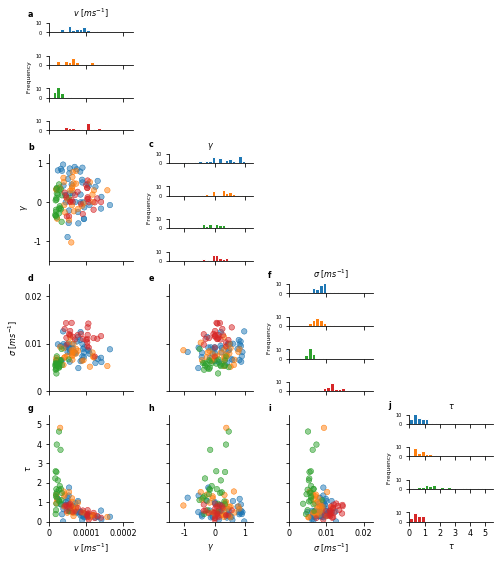

In [7]:
figure_si1(individual_estimates);
plt.savefig(join('results', 'figures', 'si_figure_1_parameter_estimates_correlations.png'), dpi=330)
plt.savefig(join('results', 'figures', 'si_figure_1_parameter_estimates_correlations.pdf'), dpi=330)

# Correlation table

In [8]:
parameters = ['v', 'gamma', 's', 'tau']
corrs = {}
corrs_table = {}
ps = {}
ps_table = {}
for p1 in parameters:
    corrs_table[p1] = []
    ps_table[p1] = []
    for p2 in parameters:
        _,_,r,p,_ = linregress(multiplicative_estimates[p1].values,
                               multiplicative_estimates[p2].values)
        corrs[(p1, p2)] = r
        corrs_table[p1].append(r)
        ps[(p1, p2)] = p
        ps_table[p1].append(p)

In [9]:
r_table = pd.DataFrame(corrs_table, index=parameters)
r_table

,gamma,s,tau,v
v,0.063014,0.261000,-0.588664,1.000000
gamma,1.000000,0.097936,-0.098303,0.063014
s,0.097936,1.000000,-0.267730,0.261000
tau,-0.098303,-0.267730,1.000000,-0.588664


In [10]:
ps_table = pd.DataFrame(ps_table, index=parameters)
ps_table

,gamma,s,tau,v
v,0.497841,0.004308,2.373948e-12,0.000000e+00
gamma,0.000000,0.291392,2.895794e-01,4.978410e-01
s,0.291392,0.000000,3.378296e-03,4.308266e-03
tau,0.289579,0.003378,0.000000e+00,2.373948e-12
